In [2]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [147]:
X,y = make_regression(n_features=1,bias=100,random_state=10,noise=20)
X = (X-X.mean())/X.std()
y = (y-y.mean())/y.std()

In [182]:
class MultiLinear:
    
    def __init__(self,lr = 0.1,iters = 10):
        self.lr = lr
        self.iters = iters
    
    def fit(self,X,y):
        self.coef_ = np.random.randn(X.shape[1],1)
        self.bias_ = np.random.random()
        errors = []
        for i in range(self.iters):
            errors.append(self.gradientdesc(X,y))
        return errors
        
    def gradientdesc(self,X,y):
        delta_coef_,delta_bias_,errors = self.gradient(X,y)
        self.coef_ += delta_coef_
        self.bias_ += delta_bias_
        return errors
        
    def gradient(self,X,y):
        yh = self.hypo(X)
        ya = y.reshape(-1,1)
        dmsedm = np.dot(X.T,(yh-ya))/len(X)
        dmsedc = np.mean(2*(yh-ya))
        mse = np.mean((yh-ya)**2)
        return -dmsedm*self.lr,-dmsedc*self.lr,mse
    
    def hypo(self,X):
        return np.dot(X,self.coef_) + self.bias_
    
    def predict(self,X):
        return self.hypo(X).flatten()

In [246]:
model = MultiLinear(lr=1.0,iters=50)

In [247]:
errors = model.fit(X,y)

In [248]:
yh = model.hypo(X)

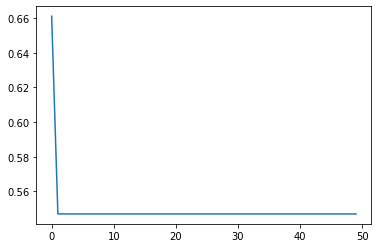

In [249]:
plt.plot(errors)

In [250]:
model.coef_

array([[0.85284484]])

In [251]:
model.predict(X[:10])

array([-0.54866821, -0.79732699,  1.9924908 ,  0.24895165,  0.02216331,
        0.70867222,  1.6280599 , -0.01307694,  1.44920672,  0.29973402])

In [252]:
y[:10]

array([-0.66596729, -1.17971138,  2.34493403, -0.46180997, -0.68900776,
        0.75349402,  2.17684541, -0.69979045,  0.31009828,  0.69243057])

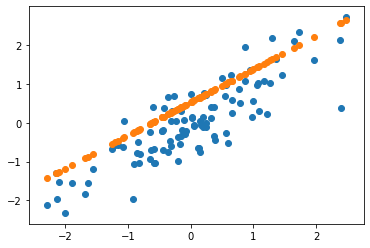

In [253]:
plt.scatter(X,y)
plt.scatter(X,model.predict(X))